In [1]:
%matplotlib inline
import numpy
import scipy.linalg
import matplotlib.pyplot as pyplot

### 東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# 2-3 連立方程式

##  連立1次方程式

* 2変数連立1次方程式の行列表示
  $\displaystyle \begin{cases} ax+by = p \\ cx+dy = q\end{cases}$<br>
  * この２つを同時に満たす$x,y$を求めたい
  * 行列の積の定義から以下の形にまとめることができる<br>
  $\displaystyle A \vec{x} = \vec{p}$<br>
  ただし、$\displaystyle A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, $\displaystyle \vec{x} = \begin{bmatrix} x \\ y \end{bmatrix}$, $\displaystyle p = \begin{bmatrix} p \\ q \end{bmatrix}$

* 2変数連立1次方程式の解
  * $A$が正則である(逆行列が存在する)場合には、両辺から$A^{-1}$をかけて<br>
    $\vec{x} = A^{-1} \vec{p}$
  * $A^{-1}$の一意性から解$\vec{x}$も一意(唯一の解)
  * $A$が正則でない場合は以下の二通り
    * 解なし
    * 無数の解が存在

* 例1: $\displaystyle A = \begin{bmatrix} 1 & 1 \\ 2 & 4 \end{bmatrix}$, $\displaystyle p = \begin{bmatrix} 7 \\ 20 \end{bmatrix}$ <br>
  $|A| = 2 \ne 0$ であるから逆行列が存在して、$\displaystyle A^{-1} = \frac{1}{2} \begin{bmatrix} 4 & -1 \\ -2 & 1 \end{bmatrix}$<br>
  $\displaystyle \vec{x} = \frac{1}{2} \begin{bmatrix} 4 & -1 \\ -2 & 1 \end{bmatrix}  \begin{bmatrix} 7 \\ 20 \end{bmatrix} = \begin{bmatrix} 4 \\ 3 \end{bmatrix}$
  * 唯一の解が存在
* 例2: $\displaystyle A = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}$, $\displaystyle p = \begin{bmatrix} 7 \\ 20 \end{bmatrix}$ <br>
  $|A| = 0$ であるから$A$の逆行列は存在しない<br>
  $x+2y=7$ ⇒ $x = 7-2y$ を $2x+4y = 20$に代入すると $14=20$ (矛盾)
  * 解なし
* 例3: $\displaystyle A = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}$, $\displaystyle p = \begin{bmatrix} 10 \\ 20 \end{bmatrix}$ <br>
  $|A| = 0$ であるから$A$の逆行列は存在しない<br>
  $x+2y=10$ ⇒ $x = 10-2y$ を $2x+4y = 20$に代入すると $20=20$ となり、いつでも成り立つ<br>
  * 実際、$x+2y=10$と$2x+4y = 20$は同じ式
  * 無数の解が存在: $x=10 - 2t$, $y=t$ ($t$は任意の定数)

## 幾何学的解釈
* 例1<br>
$x+y=7$と$2x+4y=20$の交点 ⇒ $y=-x+7$と$y=-\frac{1}{2}x+5$の交点

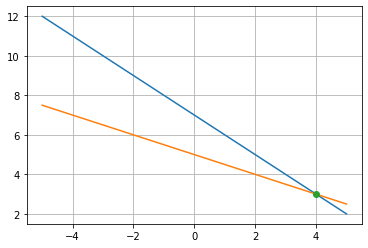

In [2]:
x = numpy.linspace(-5,5);
pyplot.plot(x, -x+7);
pyplot.plot(x, -0.5*x+5);
pyplot.plot([4], [3], "o");
pyplot.grid(which="major");

* 例2<br>
$x+2y=7$と$2x+4y=20$の交点 ⇒ $y=-\frac{1}{2}x+\frac{7}{2}$と$y=-\frac{1}{2}x+5$の交点

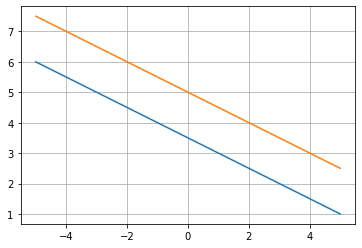

In [3]:
x = numpy.linspace(-5,5);
pyplot.plot(x, -0.5*x+3.5);
pyplot.plot(x, -0.5*x+5);
pyplot.grid(which="major");

* 例3<br>
$x+2y=10$と$2x+4y=20$の交点 ⇒ $y=-\frac{1}{2}x+5$と$y=-\frac{1}{2}x+5$の交点

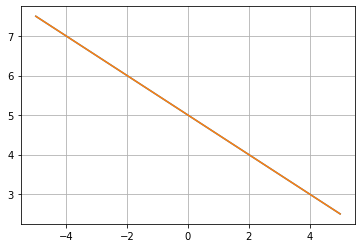

In [4]:
x = numpy.linspace(-5,5);
pyplot.plot(x, -0.5*x+5);
pyplot.plot(x, -0.5*x+5);
pyplot.grid(which="major");

## 幾何学的意味 (線型写像として)

* $2 \times 2$行列$A$が正則でない場合 ⇒ 階数(rank)は2より小さい
* 階数が1のとき
  * $\vec{x}$を$A$で変換すると、変換後は1本の直線上に乗る
  * $\displaystyle \begin{cases} x' = ax+by \\ y' = cx+dy \end{cases}$<br>
    1行目の両辺に$d$をかけたものから、2行目の両辺に$b$をかけたものを引く ⇒ $dx' - by' = (ad - bc) x = 0$ <br>
    あるいは、1行目の両辺に$c$をかけたものから、2行目の両辺に$a$をかけたものを引く ⇒ $cx' - ay' = (ad - bc) y = 0$ (同じ式)<br>
  * この直線 $dx' - by' = 0$ (または $cx' - ay' = 0$)に $\vec{p}$ が乗っている場合、すなわち $dp - bq = 0$ ($cp - aq = 0$) の場合 ⇒ 無数の解
  * 直線に $\vec{p}$ が乗っていない場合 ⇒ 解なし

上の例1〜例3の場合
* 例1: $A$は正則
* 例2: $dp - bq = 4 \times 7 - 2 \times 20 = -12 \ne 0$
* 例3: $dp - bq = 4 \times 10 - 2 \times 20 = 0$

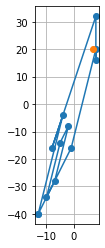

In [5]:
H = numpy.array([[-6, -6, -8, 0, 8, 6, 6, -3, -3, 0, 0, -6],
                           [-7, 2, 0, 8, 0, 2, -7, -7, -2, -2, -7, -7]]);
A = numpy.array([[1, 1], [2, 4]]);
C = A @ H;
pyplot.plot(C[0,:], C[1,:], "o-");
pyplot.plot([7], [20], "o")
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major");

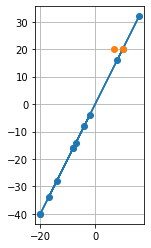

In [6]:
A = numpy.array([[1, 2], [2, 4]]);
C = A @ H;
pyplot.plot(C[0,:], C[1,:], "o-");
pyplot.plot([7,10], [20,20], "o")
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major");

* 階数が0すなわち$A=O$の場合、変換により全ての点は原点に移される
  * $\vec{p} = O$ の場合 ⇒ $\vec{x}$ は何でもよい
  * $\vec{p} \ne O$ の場合 ⇒ 解なし

## Pythonによる連立1次方程式の解放

* 計算機では、以下の2ステップで連立1次方程式を解く
  * 係数行列$A$を行列$L$ (下三角行列)と$U$ (上三角行列)の積に分解(LU分解)
  * LU分解された行列を用いて、$LU \vec{x} = \vec{p}$ を解く
* $A$を一度LU分解しておけば、異なる$\vec{p}$について連立方程式を解く場合にも再利用可
* ScipyにLU分解を行う関数scipy.linalg.lu_factorと、LU分解の結果を使って連立方程式を解く関数scipy.linalg.lu_solveが準備されている

In [7]:
A = numpy.array([[1, 2, 3], [1, 3, 4], [2, 3, 8]]);
p = numpy.array([3, 2, 1]);
LU = scipy.linalg.lu_factor(A);
x = scipy.linalg.lu_solve(LU, p);
print(x);

[ 7.  1. -2.]


In [8]:
# 答え合わせ
A @ x

array([3., 2., 1.])

In [9]:
p = numpy.array([1, 3, 7]);
x = scipy.linalg.lu_solve(LU, p);
print(x);

[-5.33333333 -0.33333333  2.33333333]


In [10]:
# 答え合わせ
A @ x

array([1., 3., 7.])